In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
N = 100 # 데이터 갯수

# PCA 짜보기

PCA를 이해할 필요는 없으나, 수식을 따라 짤수있어도 성공적임. 수식을 보고 바로바로 코드가 생각이 안 날수 있지만, 수식의 summation이 있다면 summation index가 무엇을 의미하는지(어느 축 방향으로의 sum인지), 각 행렬 또는 벡터의 차원은 어떻게 되야하는지, 수식에서 연산의 축 방향은 무엇인지를 잘 생각해보고 풀어보면 풀 수 있을듯

## 데이터 생성

row 1개가 1개 데이터 샘플임. column 1개는 feature 1개를 의미

(100, 5) 차원의 데이터 생성 -> 100개의 데이터인데, 각 데이터는 5개의 feature를 가짐

In [3]:
X = np.zeros((N, 5))
X[:70] = np.random.randn(70, 5) - 2
X[70:] = np.random.randn(30, 5) + 2

## 데이터 확인

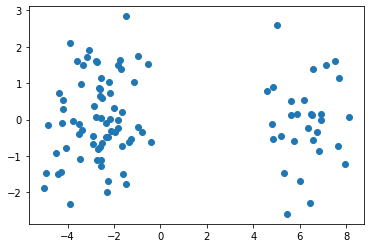

In [4]:
pca = PCA(n_components=2)
pca.fit(X)
X_vis = pca.transform(X)

plt.scatter(X_vis[:, 0], X_vis[:, 1])
plt.show()

다음을 계산:
$$
X_{\mu} = \frac{1}{N} \sum_{i=1}^N X_i
$$
($N$은 데이터 개수)

이때, summation은 데이터 샘플을 모두 더하라는 것임을 주의! 결과는 (1, 5) 차원이어야 함

In [6]:
X_mu = np.mean(X, axis=0, keepdims=True)

다음을 계산:
$$
X_{center} = X - X_{\mu}
$$

각 데이터 샘플 하나하나를 평행 이동시킬건데, 각 5개의 feature들의 평균이 0이 되도록 평행이동

결과는 (100, 5) 차원이어야 함

In [7]:
X_center = X - X_mu

다음을 계산:
$$
\Sigma = \frac{1}{N}*(X_{center}^T \cdot X_{center})
$$

$X_{center}$의 covariance matrix 계산

$\cdot$은 matrix multiplication. 결과는 (5, 5) 차원이어야 함

In [8]:
Sigma = (1/N) * np.matmul(X_center.T, X_center)

$\Sigma$의 eigen-decomposition을 계산

In [9]:
eigvals, eigvecs = np.linalg.eig(Sigma)

eigvals는 (5,) 차원의 array, eigvecs는 (5, 5) 차원의 array이다.

다음 형태의 리스트를 만들기
```python
eig_pairs = \
[(eigvals[0], eigvecs[:, 0]), (eigvals[1], eigvecs[:, 1]), (eigvals[2], eigvecs[:, 2]), (eigvals[3], eigvecs[:, 3]), (eigvals[4], eigvecs[:, 4])]
```

In [10]:
eig_pairs = [(eigvals[i], eigvecs[:, i]) for i in range(5)]

`eig_pairs`는 튜플의 리스트인데, 튜플의 첫 번째 원소의 대소관계를 이용하여 **내림차순**으로 리스트를 정렬하기(eigen value의 내림차순으로 튜플들을 정렬하라는 의미임)

정렬할때, `sorted`를 사용할 경우, `reverse=True` 인자 넣어줄 것(내림차순으로 정렬해줌)

In [11]:
eig_pairs_sorted = sorted(eig_pairs, key=lambda tup: tup[0], reverse=True)

리스트의 원소 5개 중 앞의 두개의 튜플만 뽑아오기

In [12]:
eig_pairs_sorted_2 = eig_pairs_sorted[:2]

뽑아온 두 개의 튜플에서 각각 두번째 원소(eigen vector)만 뽑아오기(`map`)

첫번째 줄만 작성!

In [13]:
eigvecs_sorted = map(lambda tup: tup[1], eig_pairs_sorted_2)
eigvecs_sorted = list(eigvecs_sorted)

두 개의 eigen vector는 각각 (5,) 차원의 array이다. 얘네를 1차원 방향으로 stacking 해 줘서 (5, 2) array를 만들 것

In [14]:
eigvecs_stacked = np.stack(eigvecs_sorted, axis=1)

다음을 계산:
$$
X_{test} = (X - X_{\mu}) \cdot U
$$

$U$는 위에서 만든 `eigvecs_stacked` 임

In [15]:
X_test = np.matmul(X_center, eigvecs_stacked)

ㅇㅋ 시각화 테스트

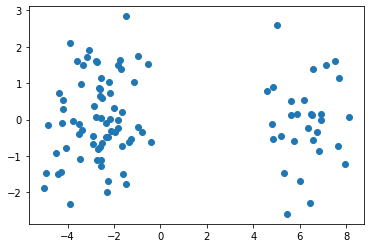

In [16]:
plt.scatter(X_test[:, 0], X_test[:, 1])
plt.show()